# Test

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from scipy import sparse
import scipy.sparse.linalg
from matplotlib import pyplot as plt
from pyunlocbox import functions, solvers
import pygsp as pg
import networkx as nx
import logging
import json
import sys
#import seaborn as sns

logging.basicConfig(format='%(asctime)s | %(levelname)s : %(message)s',
                     level=logging.INFO, stream=sys.stdout)

import src.load_data as ldata
import src.genre_graph as genre_graph

In [2]:
(movies,people,list_of_genres_id) = ldata.load_dataframes();

2019-01-14 10:43:06,518 | INFO : Data loaded !


In [3]:
list_genres=movies[['genres_names','genres']].copy()
list_genres=list_genres.drop_duplicates()
list_genres=list_genres.set_index('genres') 
list_genres

,genres_names
genres,
0,Action
1,Adventure
2,Fantasy
3,Animation
4,Science Fiction
5,Drama
6,Thriller
7,Family
8,Comedy


In [64]:
moviesFiltered = ldata.filter_movies_by_years(movies, pd.to_datetime(f'1990-01-01').date(), pd.to_datetime(f'2010-01-01').date())



In [65]:
adjacency = genre_graph.make_genre_adjacency(moviesFiltered)

Text(0.5,1.05,'adjacency matrix')

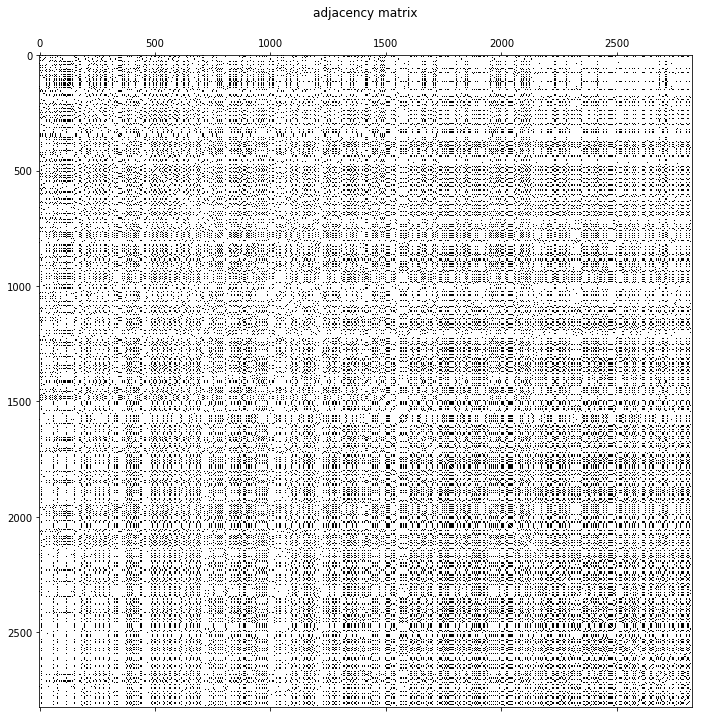

In [66]:
plt.figure(figsize=(12, 12))
plt.spy(adjacency)
plt.title('adjacency matrix')

In [67]:
G_test = nx.from_numpy_matrix(adjacency)
nx.number_connected_components(G_test)
Gc_test = max(nx.connected_component_subgraphs(G_test), key=len)
coords_test = nx.spring_layout(G_test,k=0.03)

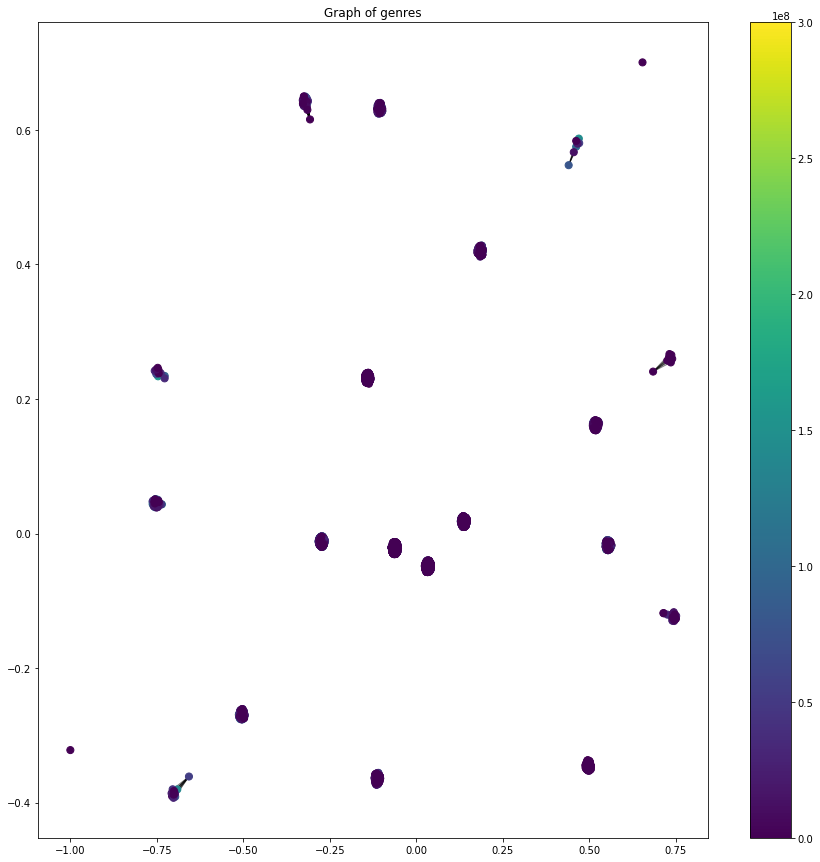

In [68]:
labels = moviesFiltered['genres'].iloc[np.sort(nx.nodes(G_test))]

plt.figure(figsize=(15, 15))

#im=nx.draw_networkx_nodes(G_test, coords_test, node_size=50,node_color=labels, cmap='tab20')

labels2 = moviesFiltered['budget'].iloc[np.sort(nx.nodes(G_test))]
im=nx.draw_networkx_nodes(G_test, coords_test,node_size=50, node_color=labels2)

nx.draw_networkx_edges(G_test, coords_test, alpha=0.5, width=1)
plt.title('Graph of genres')
plt.colorbar(im);

In [69]:
sumBudgets = moviesFiltered['budget'].sum()

percBudgets = moviesFiltered['budget'].copy()

percBudgets = percBudgets.apply(lambda x: x/sumBudgets)
percBudgetGenre = list_genres.copy()
percBudgetGenre['budget_fraction'] = 0

print(percBudgets)

for fraction in enumerate(percBudgets):
    #print(fraction)
    #print(moviesFiltered['genres'].iloc[fraction[0]])
    percBudgetGenre.loc[moviesFiltered['genres'].iloc[fraction[0]],'budget_fraction']+=fraction[1]
    
percBudgetGenre

0       2.797648e-03
1       3.541326e-03
5       3.045540e-03
8       2.951105e-03
10      3.187193e-03
11      2.360884e-03
12      2.360884e-03
15      2.655995e-03
23      2.124796e-03
24      2.443515e-03
25      2.360884e-03
30      2.360884e-03
33      2.478928e-03
35      1.770663e-03
43      2.360884e-03
53      2.183818e-03
57      2.124796e-03
58      1.652619e-03
59      2.360884e-03
60      2.360884e-03
63      2.124796e-03
65      2.183818e-03
66      2.065774e-03
67      2.065774e-03
68      1.652619e-03
70      2.006751e-03
71      1.711641e-03
73      2.065774e-03
75      2.065774e-03
76      2.065774e-03
            ...     
4740    0.000000e+00
4742    7.672873e-07
4749    0.000000e+00
4754    0.000000e+00
4756    5.902210e-07
4762    0.000000e+00
4763    0.000000e+00
4768    0.000000e+00
4769    0.000000e+00
4770    5.902210e-06
4772    3.682035e-07
4773    3.187193e-07
4775    0.000000e+00
4776    0.000000e+00
4777    0.000000e+00
4778    0.000000e+00
4779    0.000

,genres_names,budget_fraction
genres,,
0,Action,0.224305
1,Adventure,0.171625
2,Fantasy,0.040878
3,Animation,0.049911
4,Science Fiction,0.024451
5,Drama,0.180803
6,Thriller,0.033958
7,Family,0.013988
8,Comedy,0.154953


/home/jeremy/miniconda3/envs/ntds_2018/lib/python3.7/site-packages/matplotlib/legend.py:1364: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


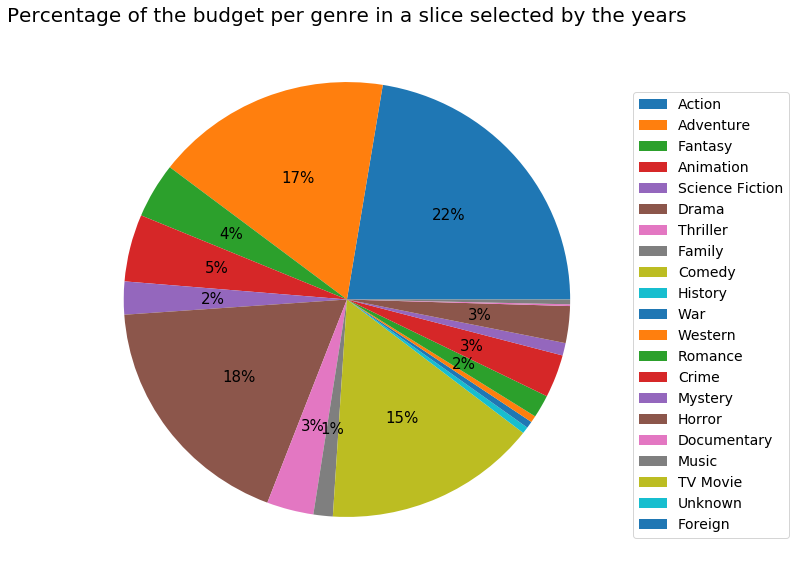

In [70]:
plt.figure(figsize = (10,10))
plt.pie(percBudgetGenre['budget_fraction'], autopct = lambda x:'{:1.0f}%'.format(x) if x > 1 else '',labeldistance=1.1,startangle=0,textprops={'fontsize': 15})
plt.title('Percentage of the budget per genre in a slice selected by the years',fontsize=20)
plt.legend(percBudgetGenre,labels=percBudgetGenre['genres_names'], bbox_to_anchor=(0.9,0.80), bbox_transform=plt.gcf().transFigure,prop={'size': 14})
plt.show()